In [405]:
# Load Data

import graphlab
import numpy as np
sf = graphlab.SFrame('ex1data1.txt')
X = sf['x']
Y = sf['y']

Assuming file is csv. For other delimiters, please use `SFrame.read_csv`.


Finished parsing file /Users/Jani/Desktop/Coursera/ML.ng/Assignment1/ex1data1.txt

Parsing completed. Parsed 96 lines in 0.0114 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[float,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/Jani/Desktop/Coursera/ML.ng/Assignment1/ex1data1.txt

Parsing completed. Parsed 96 lines in 0.012876 secs.

RuntimeError: Runtime Exception. Column name x does not exist.

# 2.1 Plotting the Data

ValueError: x and y must be the same size

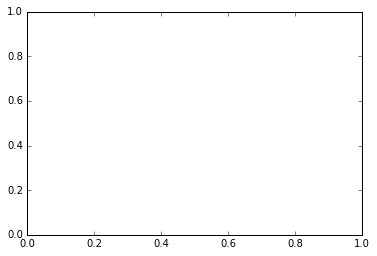

In [407]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel("Population of City in 10000s")
plt.ylabel("Profit in $10000s")

# 2.2 Gradient Descent

In [404]:
# Compute Cost Function
def computeCost(X_vals, Y_vals, theta):
    J = 0
    m = Y_vals.size
    
    h = X_vals.dot(theta)
    print h
    SEs = np.square(h-Y_vals)
    J = (sum(SEs)[0])/(2*m)
    return J

print computeCost(Xs_np, Ys_np, theta)

ValueError: shapes (97,2) and (3,1) not aligned: 2 (dim 1) != 3 (dim 0)

In [406]:
# Test Compute Cost Function

# Add column of 1 to X
X0 = np.ones(len(X))
Xs = graphlab.SFrame({'X0':X0,'X1':X})

# Make into numpy array
Xs_np = graphlab.SFrame.to_numpy(Xs)
Ys_np = graphlab.SFrame.to_numpy(graphlab.SFrame({'Y':Y}))

# Set initial values
theta = [[0],[0]]
iterations = 1500
alpha = .01

print computeCost(Xs_np, Ys_np, theta)
#print computeCost(Xs_np, Ys_np, [[-1], [2]])

ValueError: setting an array element with a sequence.

In [393]:
# Gradient Descent

def gradientDescent(X, Y, theta, alpha, iterations):
    J_history = np.zeros(iterations)
    m = Y.size
    
    for iter in np.arange(iterations):
        h = X.dot(theta)
        theta = theta - (X.T.dot(h-Y))*(alpha/m)
        J_history[iter] = computeCost(X, Y, theta)
        
    return (J_history, theta)

In [ ]:
# Test GD
gradientDescent(Xs_np, Ys_np, theta, alpha, iterations)

In [ ]:
# Plot J
theta = [[0],[0]]
iterations = 1500
alpha = .01

(Js, theta) = gradientDescent(Xs_np, Ys_np, theta, alpha, iterations)
plt.plot(Js)

# 3.1 Feature Normalization

In [ ]:
sf = graphlab.SFrame('ex1data2.txt')

In [ ]:
Y = sf['Y']
Y = graphlab.SFrame.to_numpy(graphlab.SFrame([Y]))
Y

In [396]:
# Returns as SFrame, also adds 1's column
# NOTE: pass in sframe with Y attached
def feature_norm(SF):
    X = graphlab.SFrame.to_numpy(SF)
    new_X = graphlab.SFrame()
    X0 = np.ones(len(X))
    new_X.add_column(graphlab.SArray(X0), name='X0')
    for i in range (0, X.shape[1]-1):
        current_x = X[:,i]
        mu = np.mean(current_x)
        sd = np.std(current_x)
        new = (current_x-mu)/sd
        print mu, sd

        new_X.add_column(graphlab.SArray(new), name='X'+str(i+1))
    return new_X

feature_norm(sf)

2000.68085106 786.202618743
3.17021276596 0.752842809062


X0,X1,X2
1.0,0.131415422021,-0.226093367578
1.0,-0.509640697591,-0.226093367578
1.0,0.507908698618,-0.226093367578
1.0,-0.743677058719,-1.5543919021
1.0,1.27107074578,1.10220516694
1.0,-0.0199450506651,1.10220516694
1.0,-0.593588522778,-0.226093367578
1.0,-0.729685754521,-0.226093367578
1.0,-0.789466781548,-0.226093367578
1.0,-0.644465992588,-0.226093367578


# Multivariate Linear Regression

In [402]:
X_norm = graphlab.SFrame.to_numpy(feature_norm(sf))
theta = [[0],[0],[0]]
iterations = 400
alpha = .01

computeCost(X_norm, Y, theta)
(Js, theta) = gradientDescent(X_norm, Y, theta, alpha, iterations)

x1test = (1650-2000.68085106)/786.202618743
x2test = (3-3.17021276596)/0.752842809062

theta[0][0] + (theta[1][0]*x1test) + (theta[2][0]*x2test)

2000.68085106 786.202618743
3.17021276596 0.752842809062


289221.54737168882